In [1]:
%pylab inline
import netCDF4
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle


root = r'D:\Documents\GIT_checkouts\aeolis-models\sandmotor'

# load colormap
fp = open('cmap.pkl', 'rb')
shore_map = pickle.load(fp)
fp.close()


Populating the interactive namespace from numpy and matplotlib


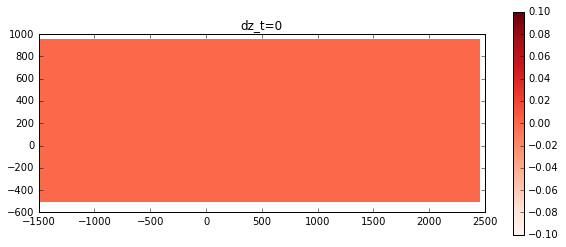

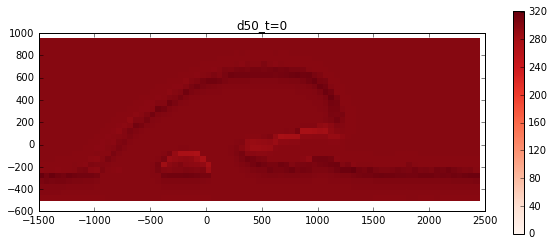

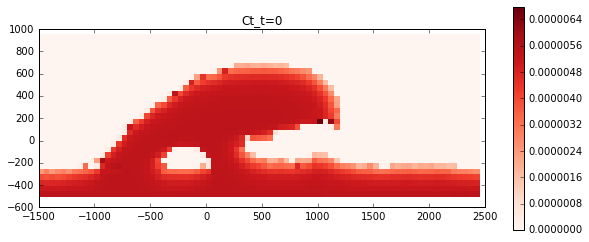

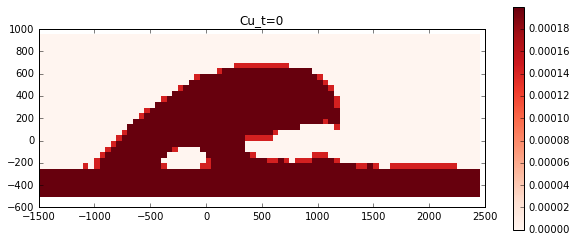

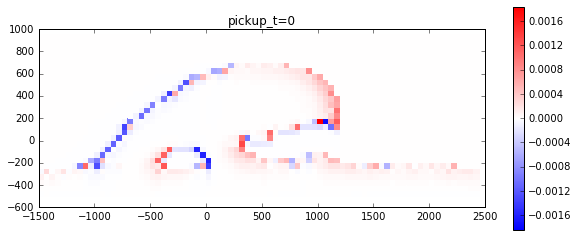

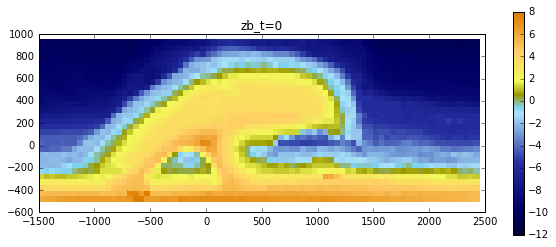

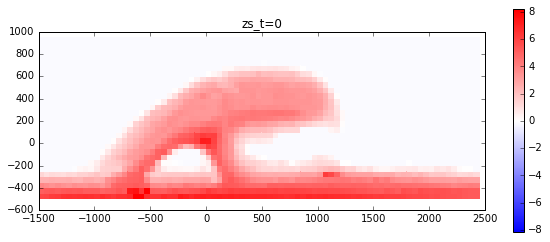

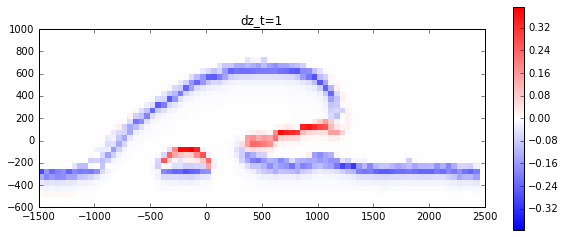

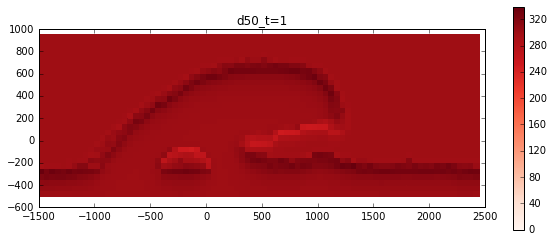

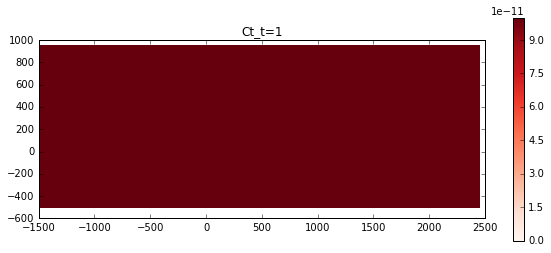

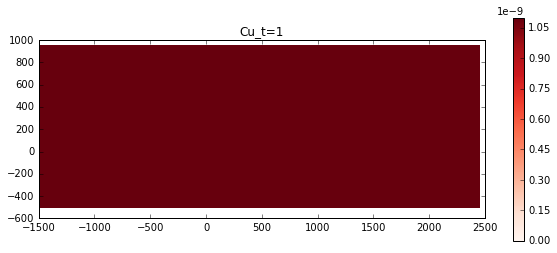

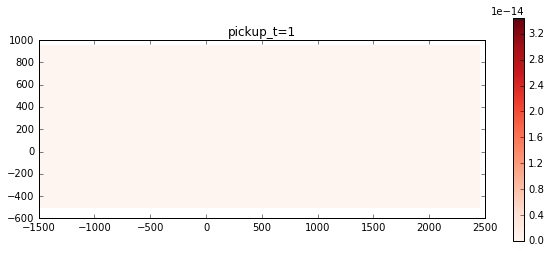

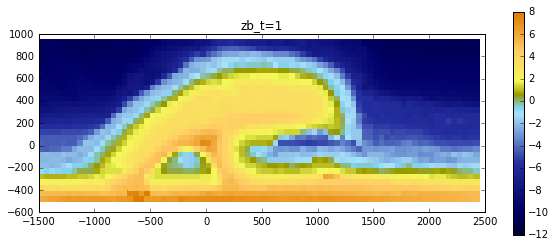

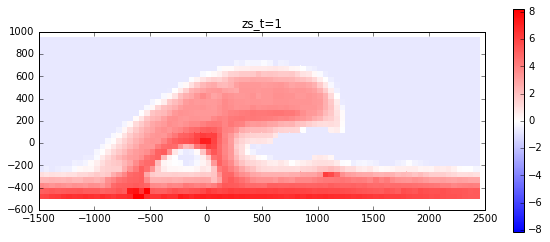

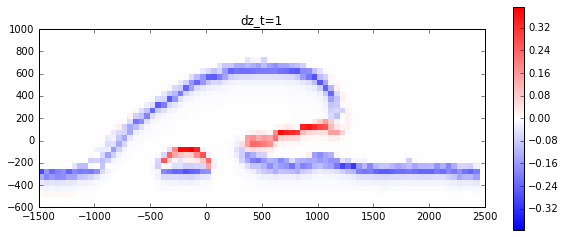

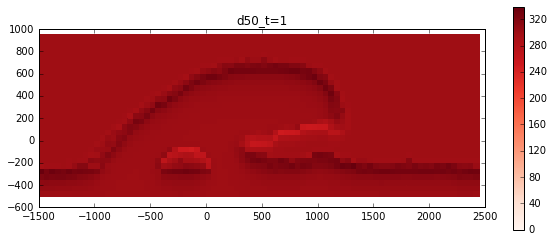

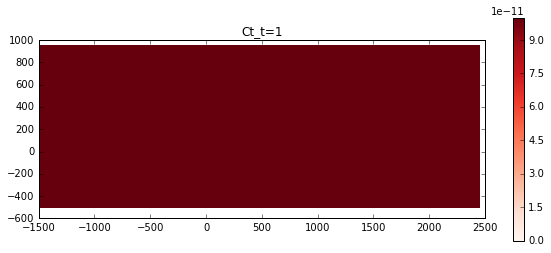

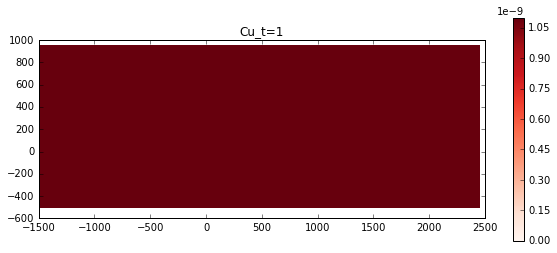

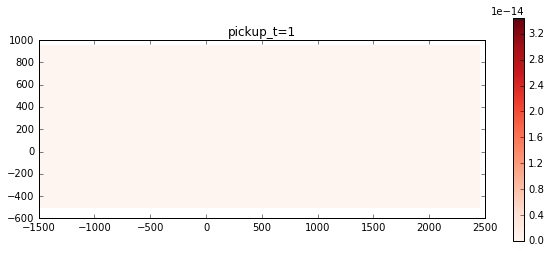

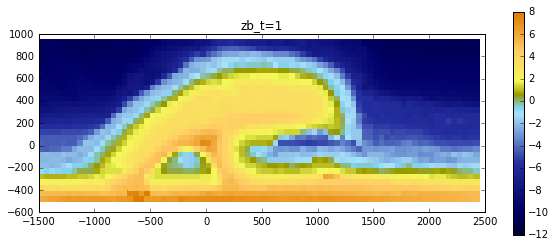

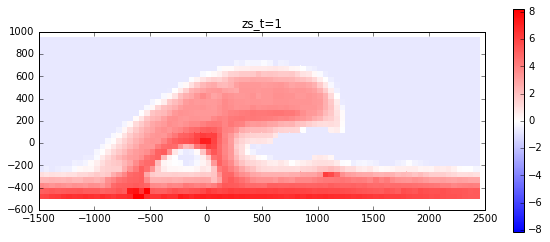

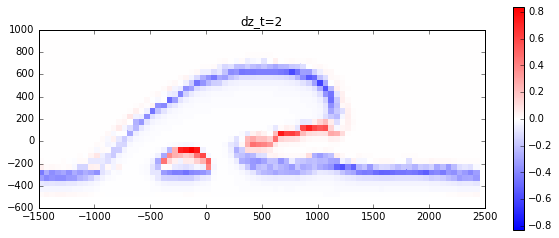

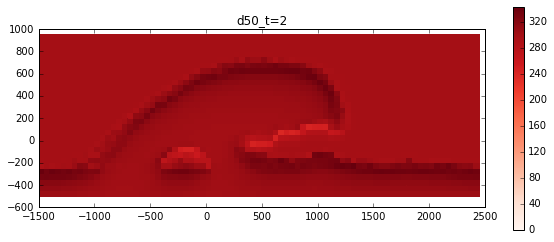

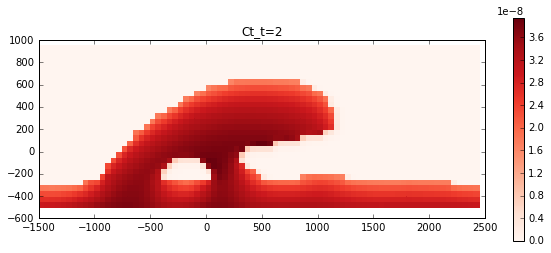

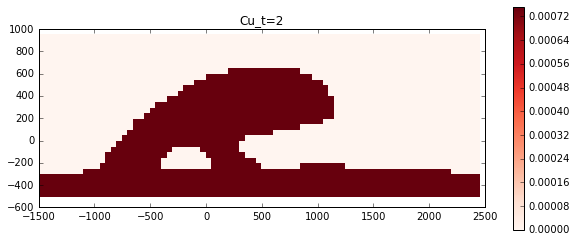

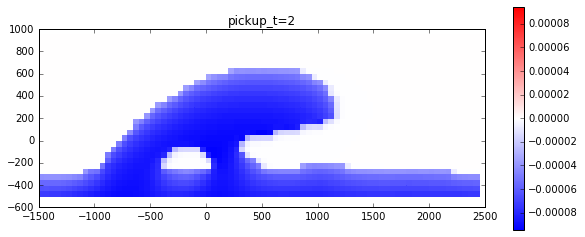

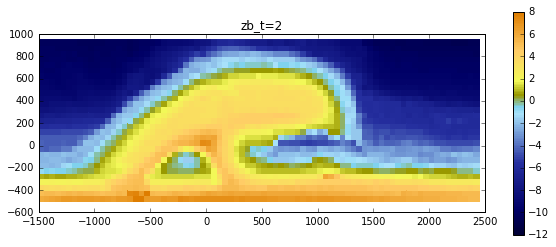

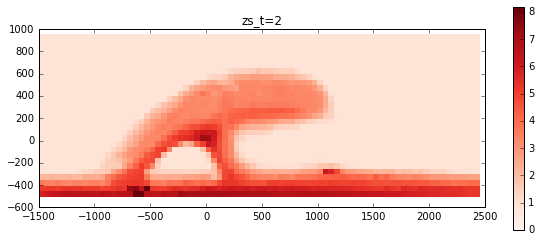

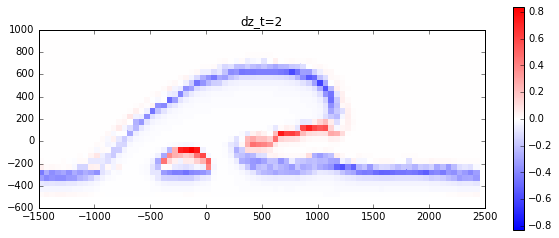

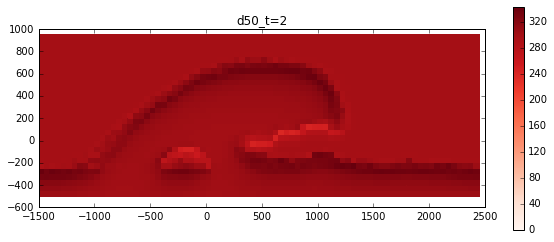

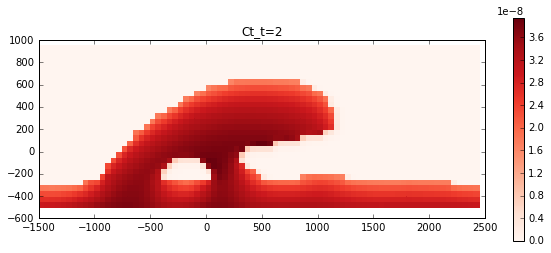

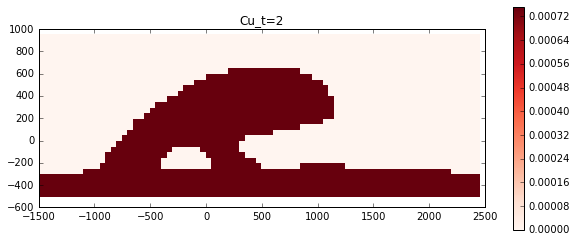

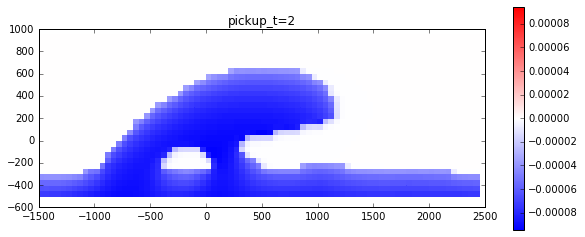

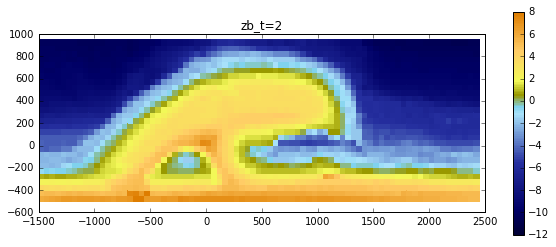

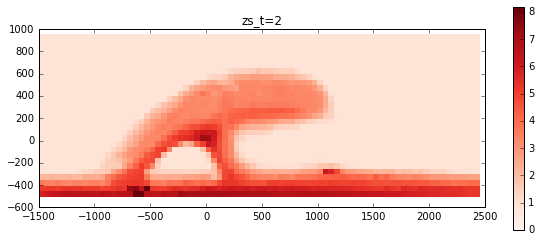

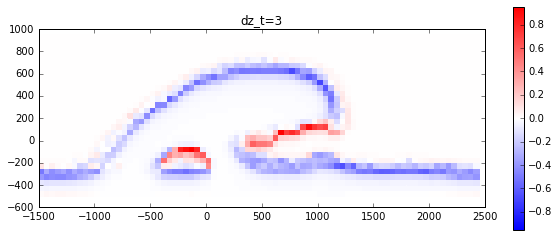

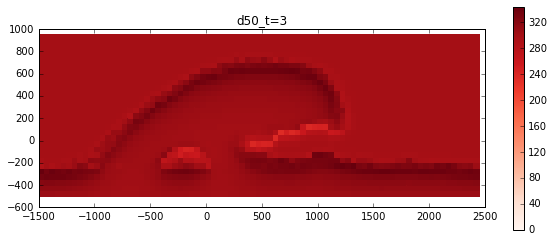

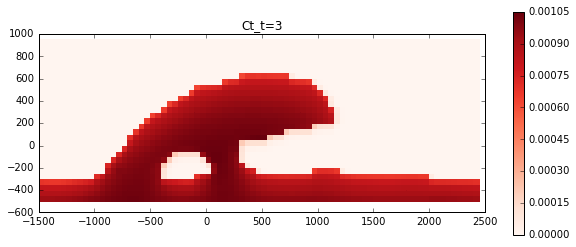

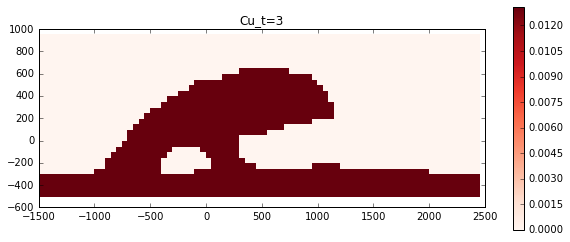

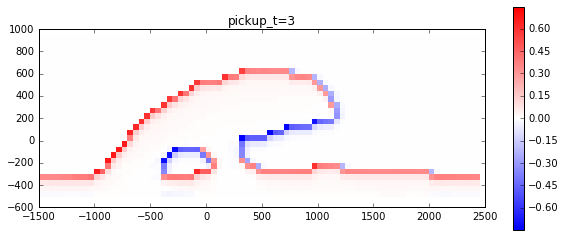

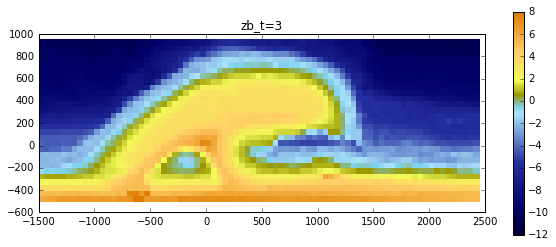

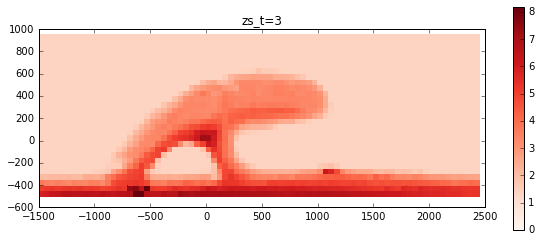

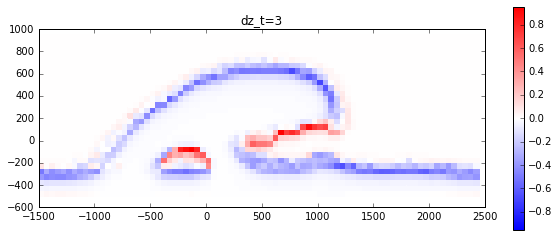

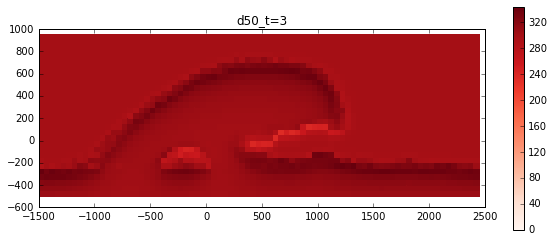

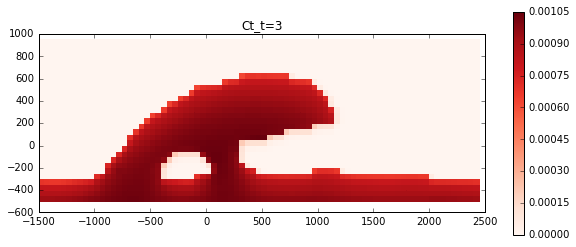

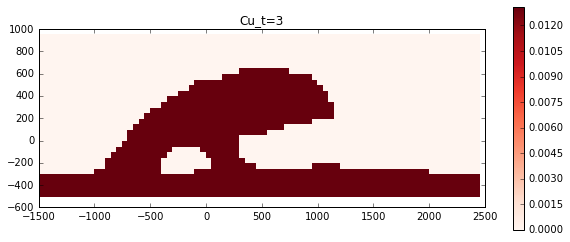

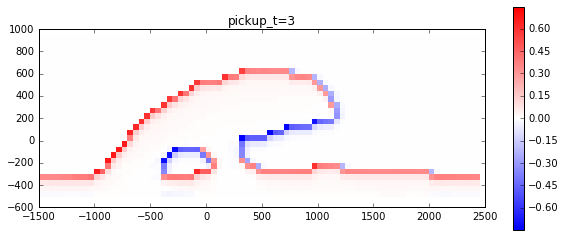

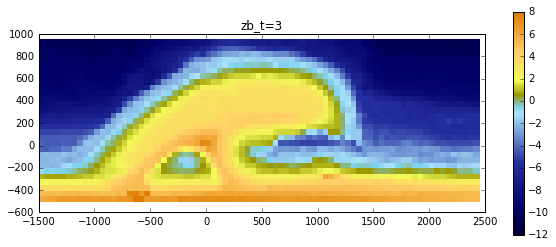

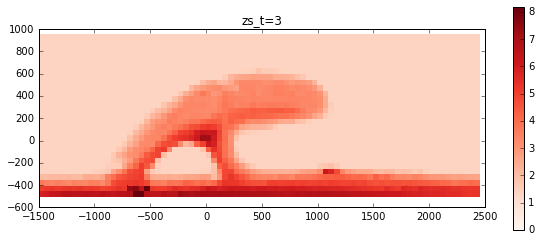

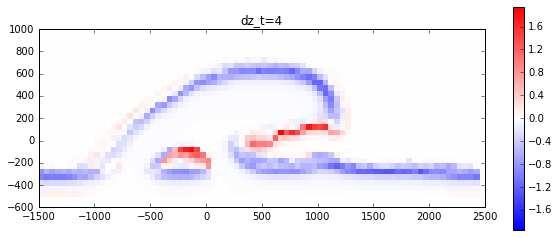

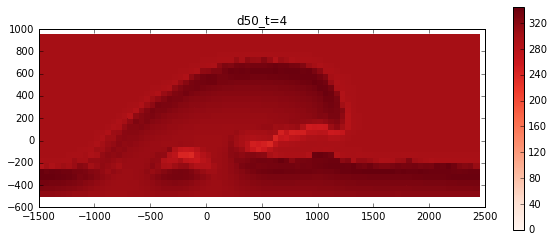

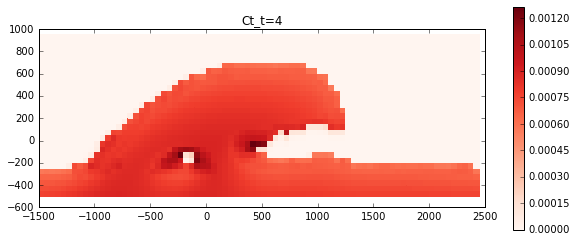

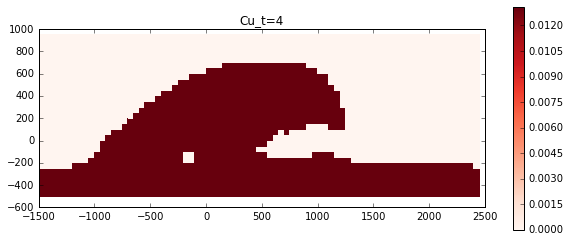

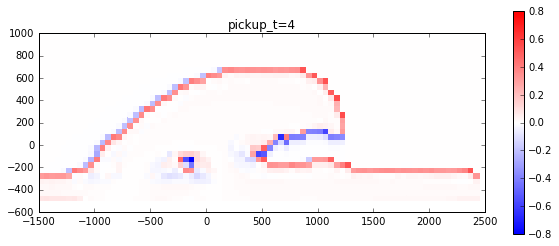

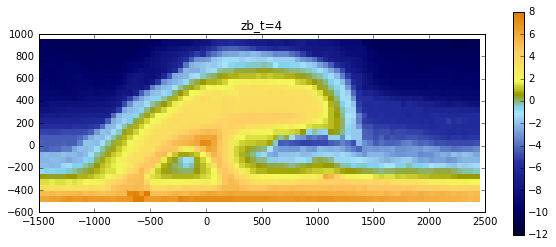

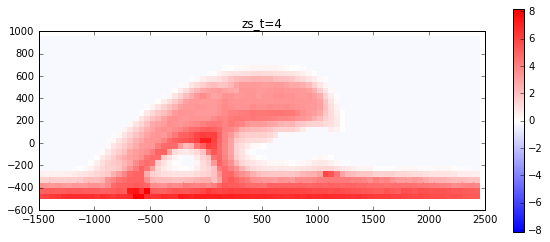

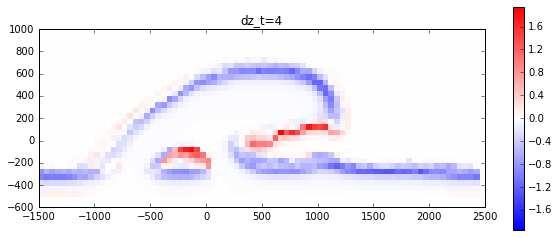

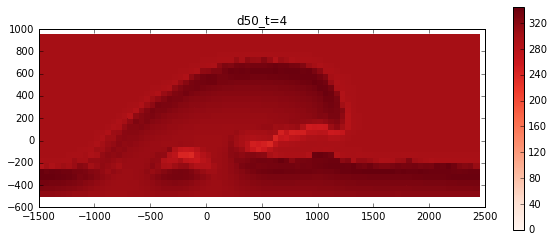

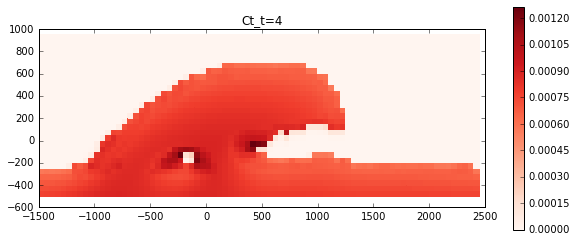

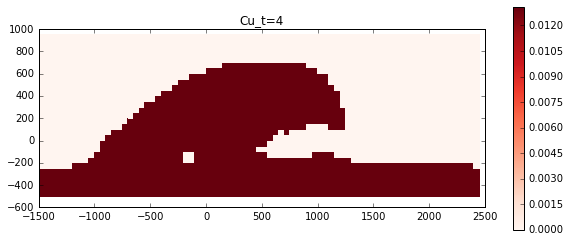

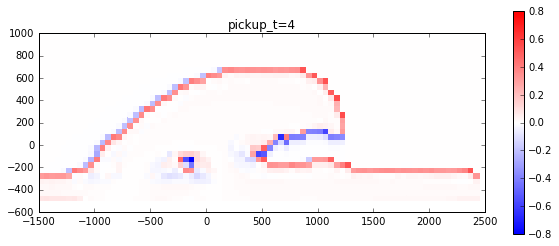

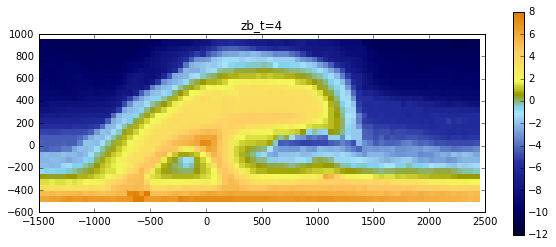

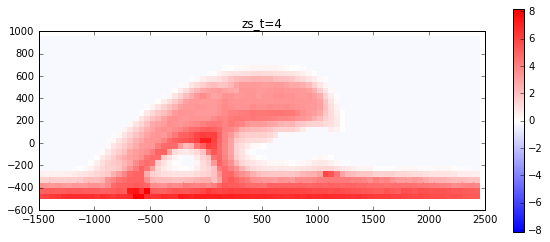

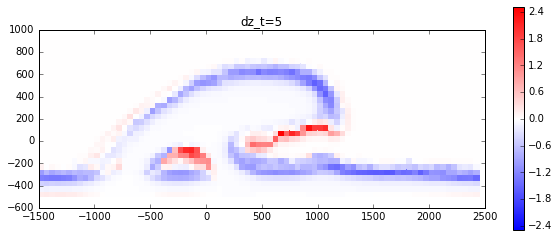

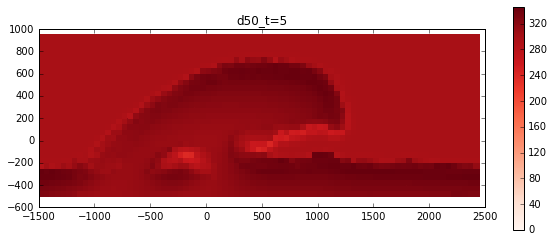

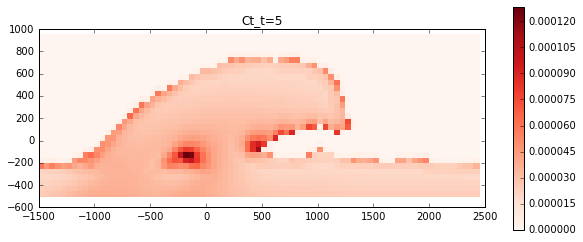

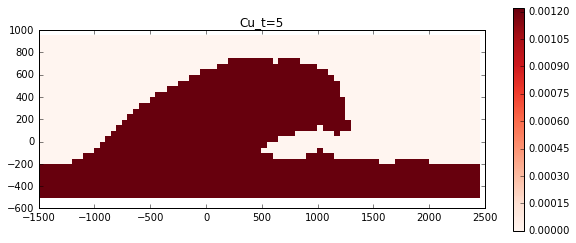

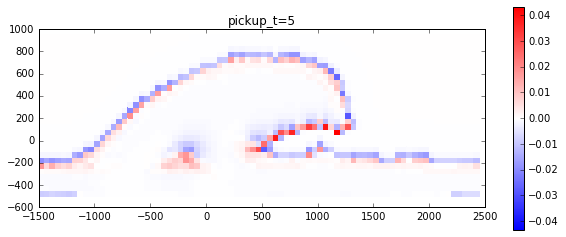

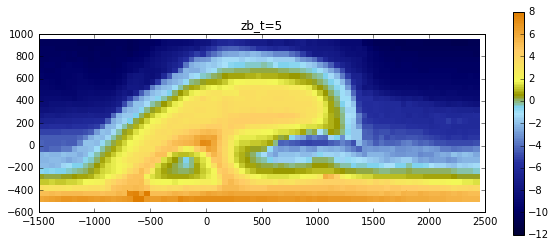

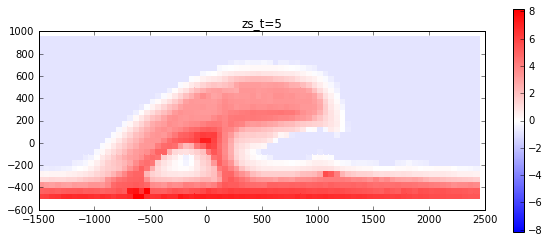

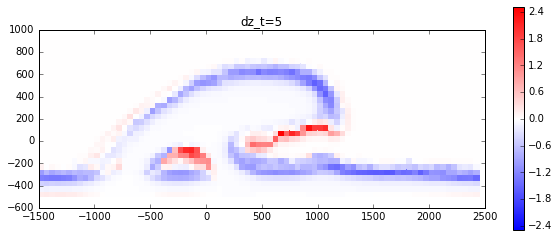

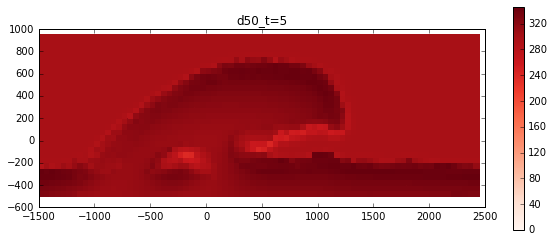

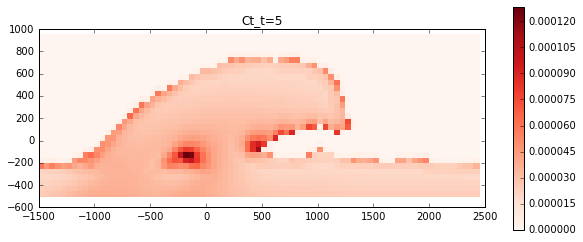

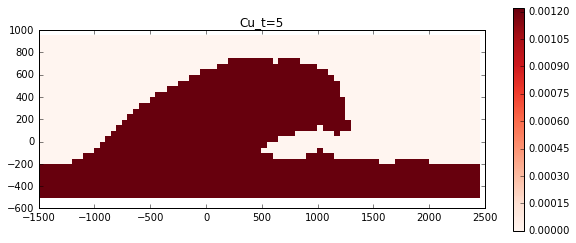

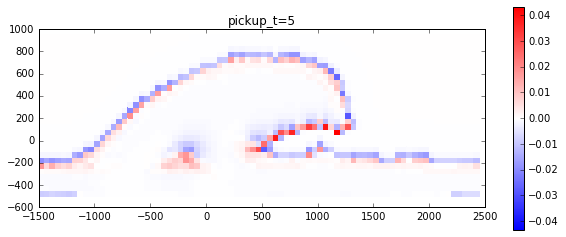

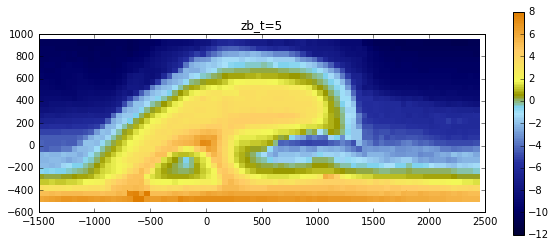

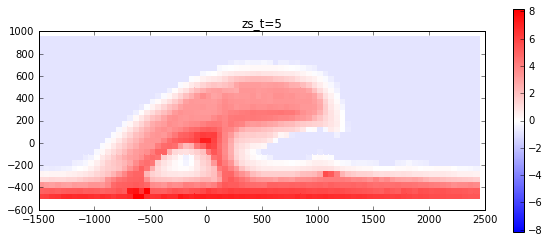

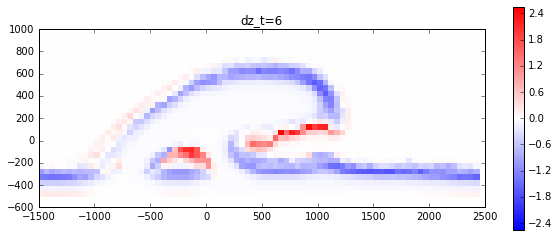

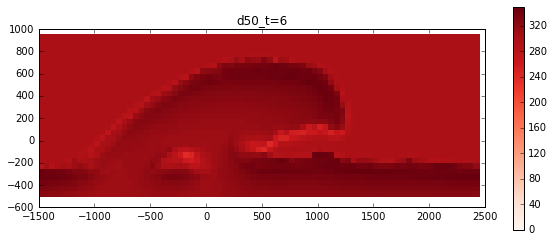

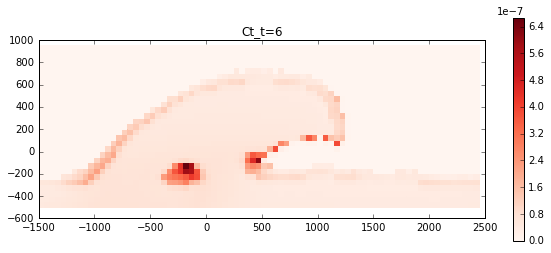

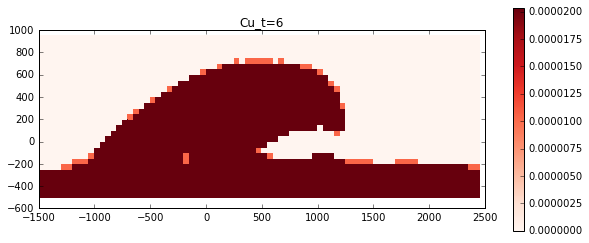

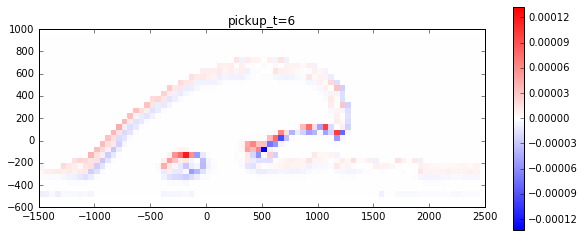

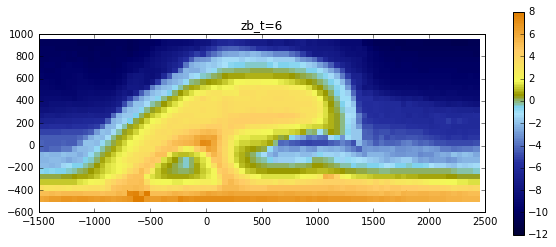

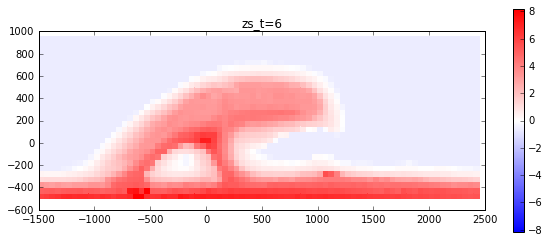

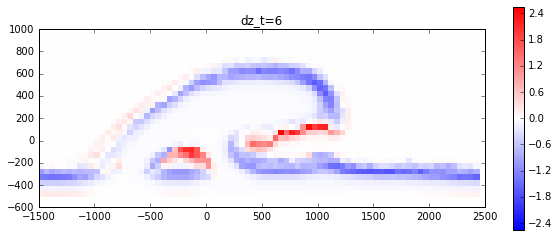

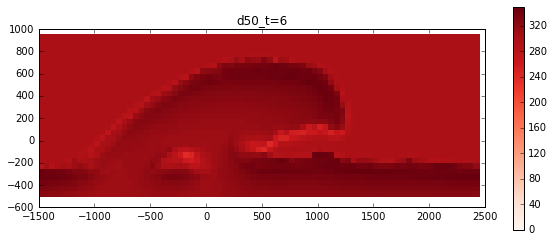

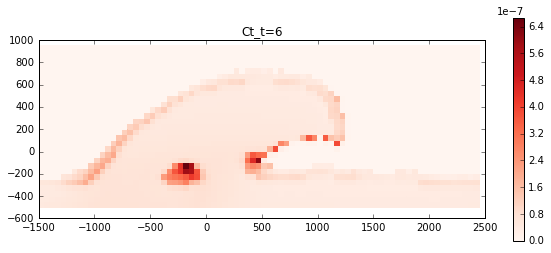

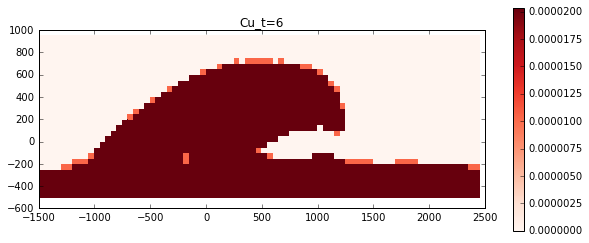

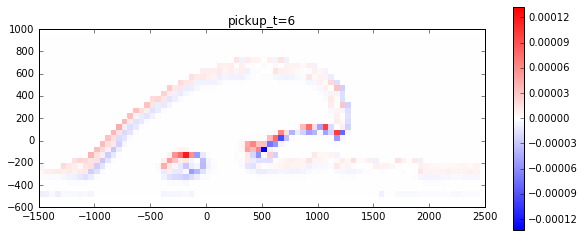

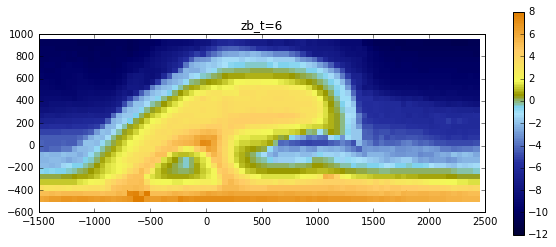

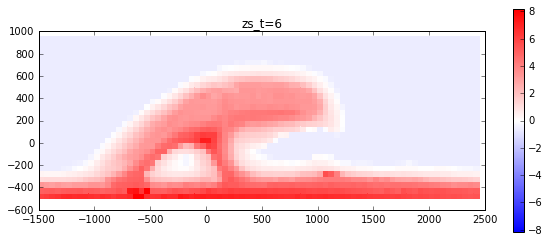

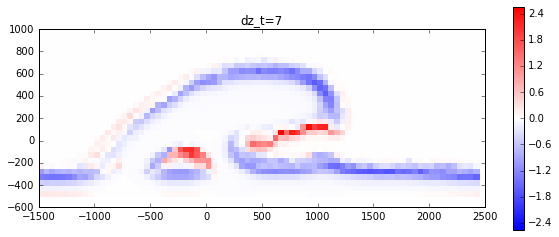

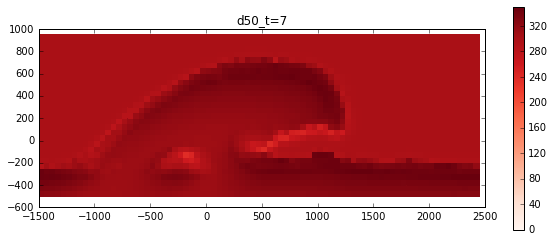

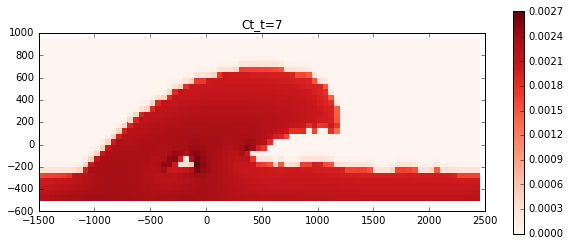

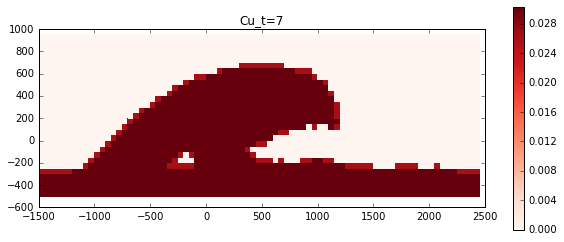

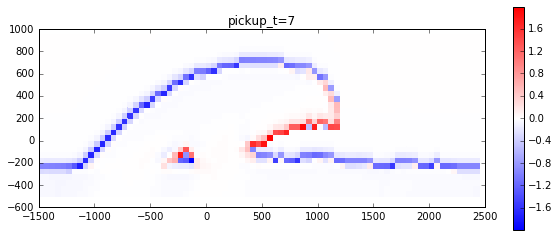

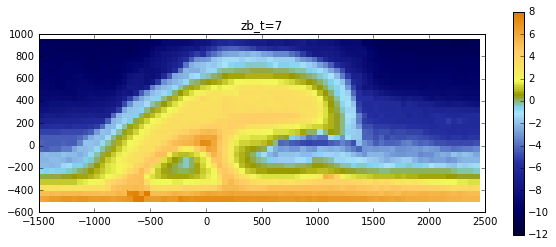

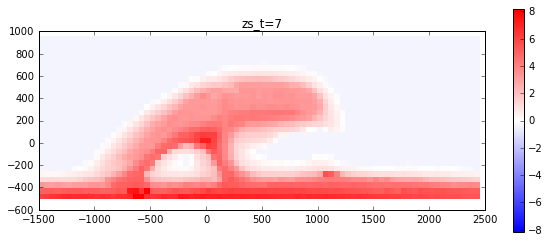

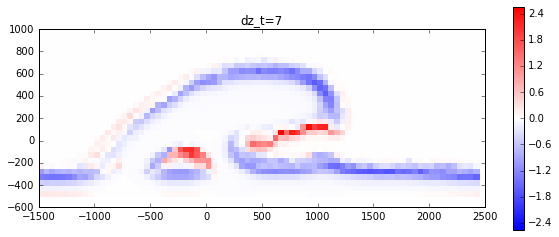

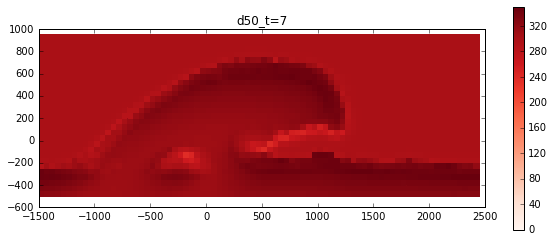

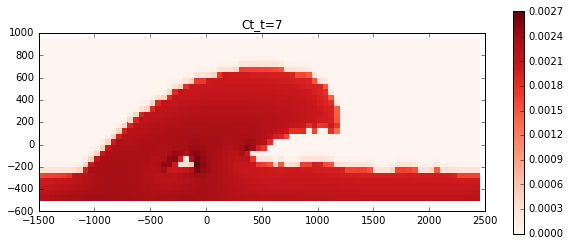

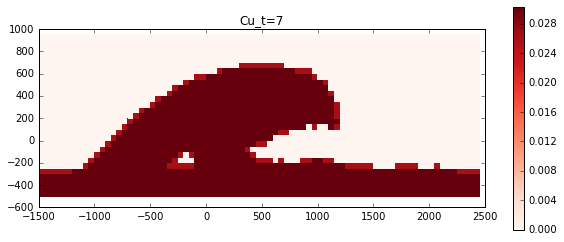

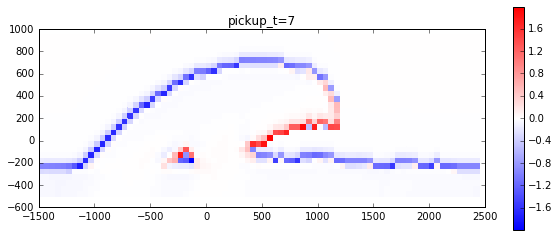

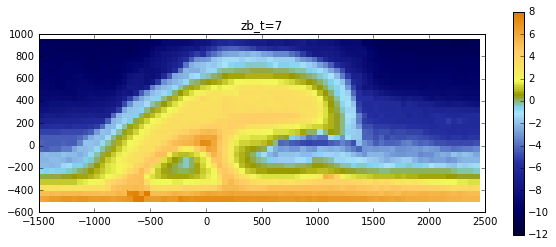

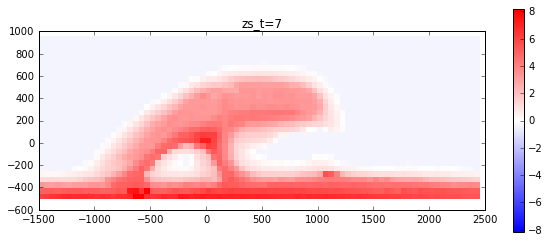

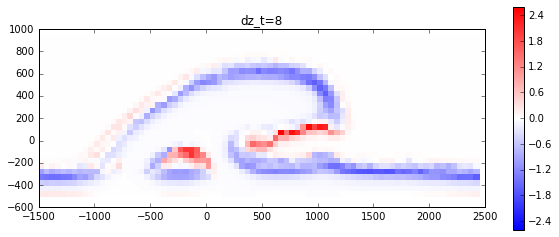

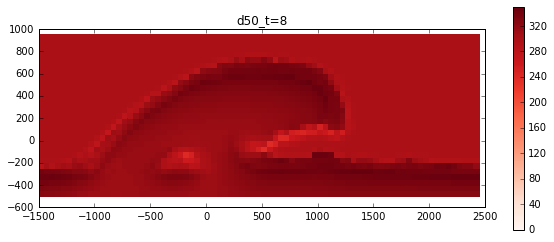

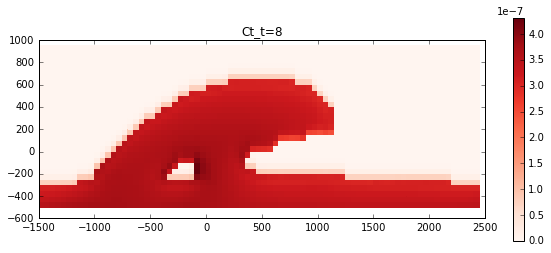

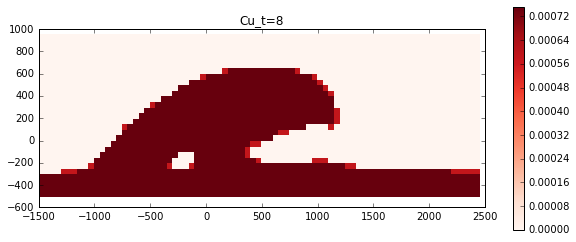

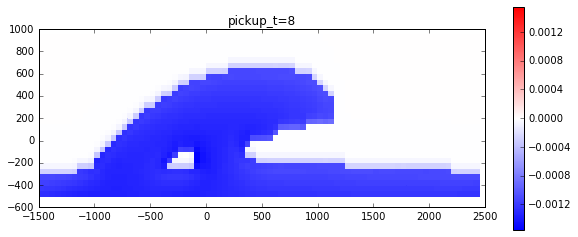

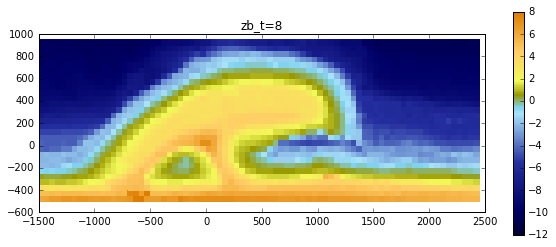

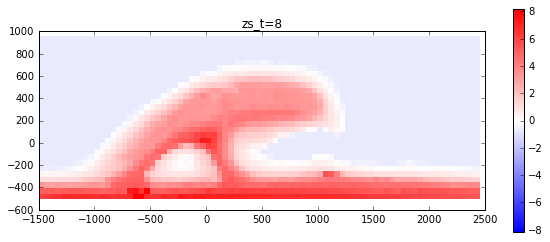

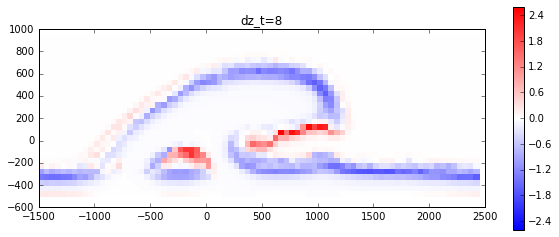

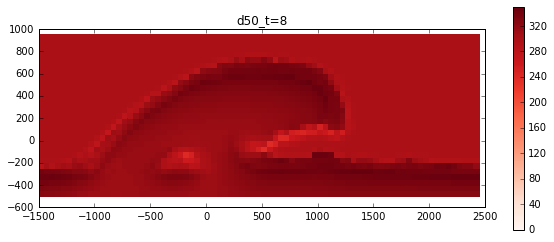

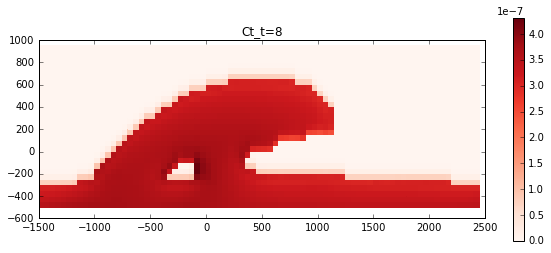

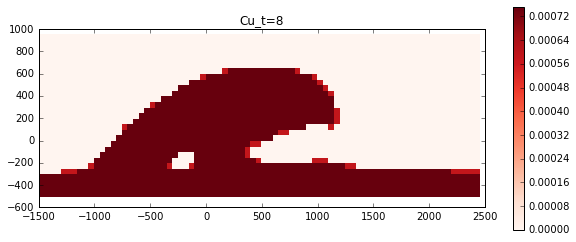

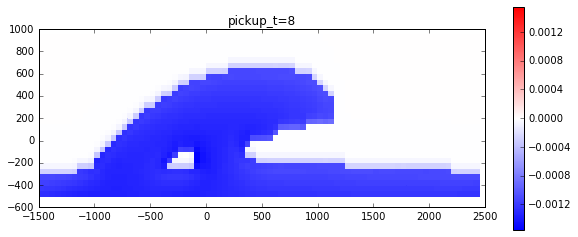

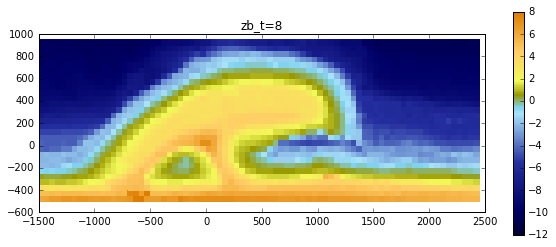

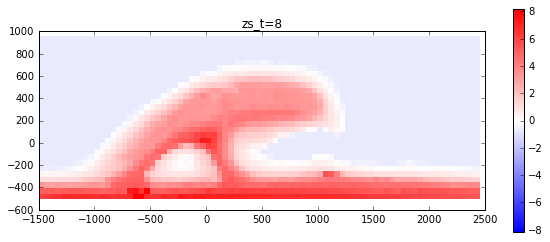

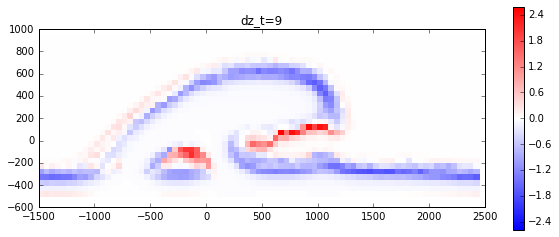

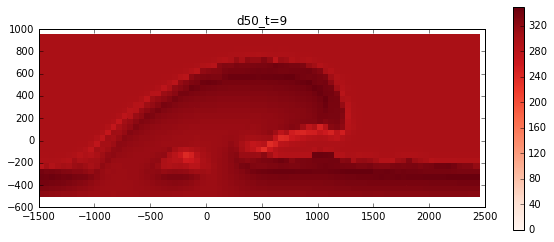

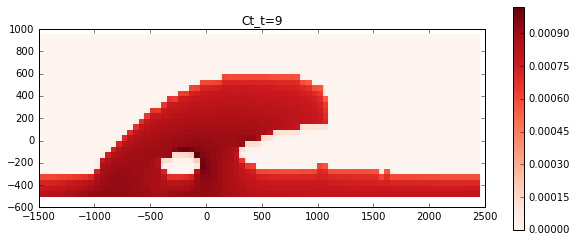

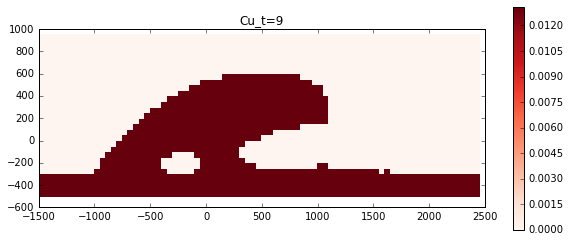

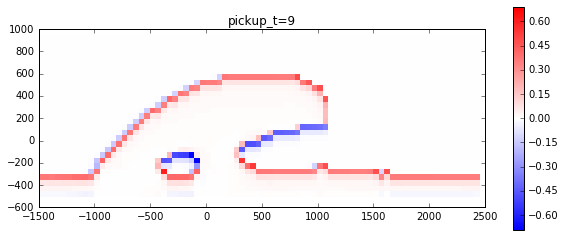

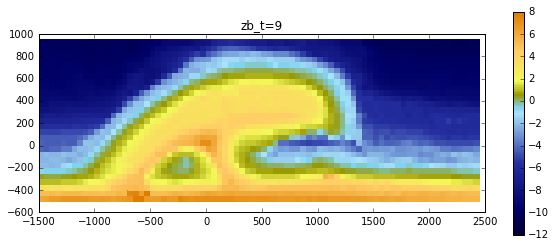

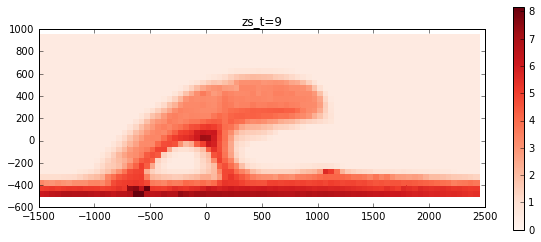

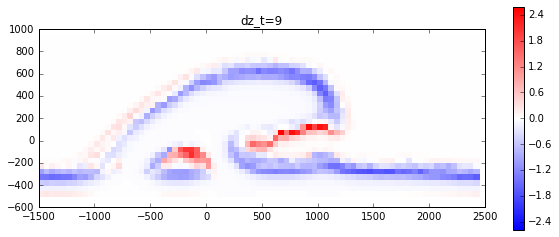

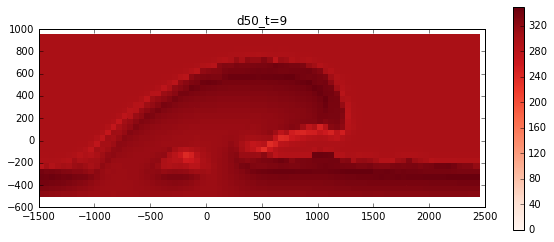

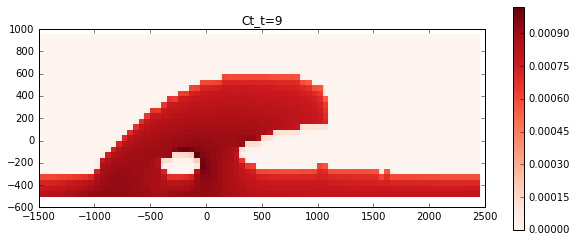

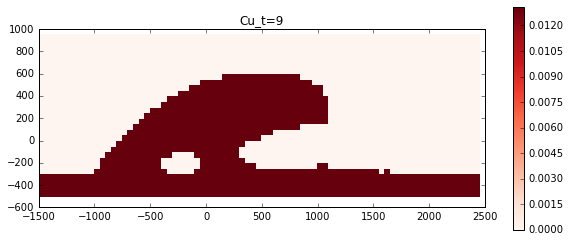

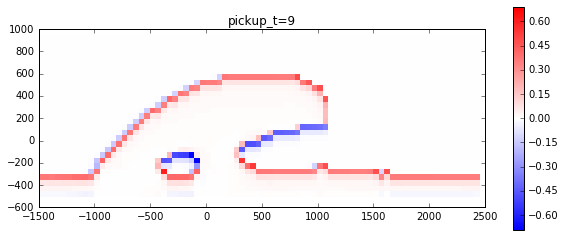

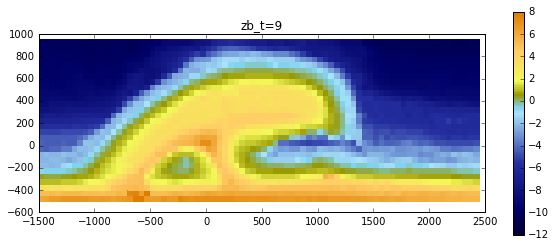

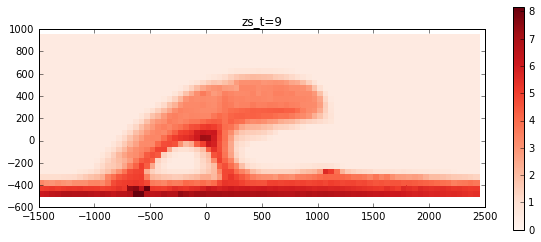

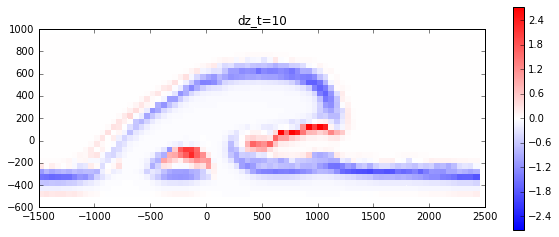

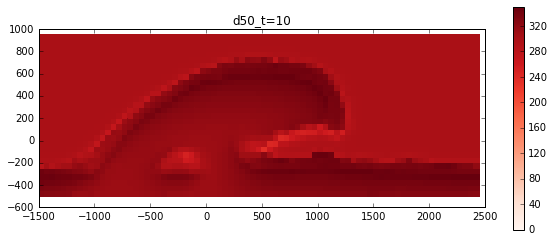

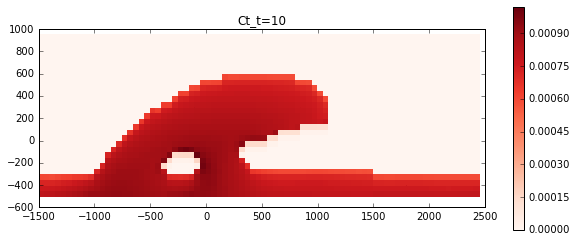

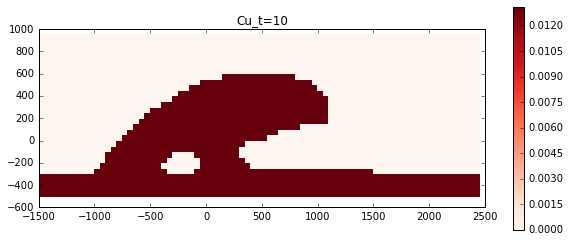

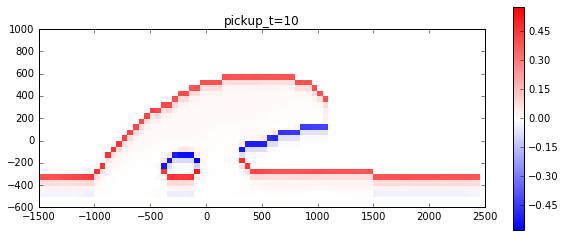

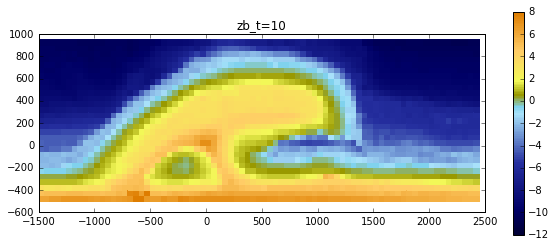

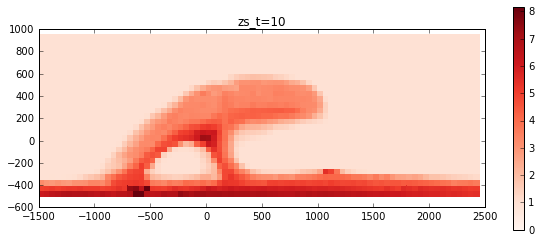

In [14]:
def create_plot(par, data):
    
    # remove inf's
    ix = np.isinf(data)
    data[ix] = np.nan
    
    # remove extra dimensions
    if data.ndim == 4:
        data = data[:,:,0,:] # pick top layer
    if data.ndim == 3:
        data = data.sum(axis=-1) # sum over fractions
    
    # determine data range
    mn = np.nanmin(data[1:-1,1:-1])
    mx = np.nanmax(data[1:-1,1:-1])
    mx = np.maximum(np.abs(mn), np.abs(mx))

    if mn > -1e-10:
        mn = 0.
        cmap = 'Reds'
    elif par[0:2] == 'zb':
        cmap = shore_map
        mn = -12
        mx = 8
    else:
        mn = -mx
        cmap = 'bwr'

    # create plot
    fig, axs = plt.subplots(figsize=(10,4))
    p = axs.pcolormesh(y, x, data, cmap=cmap, vmin=mn, vmax=mx)
    axs.set_aspect('equal')
    axs.set_title(par)
    fig.colorbar(p)
      

    # save plot
    fig.savefig(os.path.join(root, 'aeolis_year_all_thick', '%s.png' % par))

    
n = 20 # number of time steps

with netCDF4.Dataset(os.path.join(root, 'aeolis_year_all_thick.nc'), 'r') as ds:
    t = ds.variables['time'][:] / 3600.
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    f = ds.variables['fractions'][:]
    
    nx = x.shape[1]
    ny = y.shape[0]
    
    for t in np.linspace(0, len(t)-1, n):
        
        t = int(np.round(t))
    
        # bathy difference
        data = ds.variables['zb'][...]
        create_plot('dz_t=%d' % t, data[t,:,:] - data[0,:,:])

        # mean grain size
        #data = ds.variables['mass'][...]
        gs = ds.groups['settings'].getncattr('grain_size') * 1e6
        create_plot('d50_t=%d' % t,
                   np.asarray([np.average(gs, weights=ds.variables['mass'][t,j,i,0,:])
                               for j in range(ny) for i in range(nx)]).reshape((ny, nx)))
        
        # other variables
        for par in ['Ct', 'Cu', 'pickup', 'zb', 'zs']:
            create_plot('%s_t=%d' % (par, t), ds.variables[par][t,...])
        #for par in ['zb']:
        #    create_plot('%s_t=%d' % (par, t), ds.variables[par][t,...])

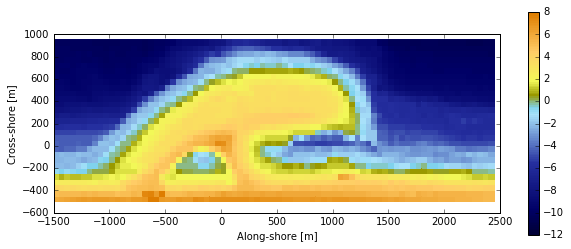

In [8]:
# create animation
    
n = 20 # number of time steps

run = 'aeolis_10year_sorting_noHydro'

with netCDF4.Dataset(os.path.join(root, '%s.nc' % run), 'r') as ds:
    t = ds.variables['time'][:] / 3600.
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    zb = ds.variables['zb'][:]
    
    nx = x.shape[1]
    ny = y.shape[0]
    
    
    #ix = np.isinf(data)
    #data[ix] = np.nan
    
    #initialize frame
    fig, axs = plt.subplots(figsize=(10,4), facecolor='white')
    axs.set_aspect('equal')
    axs.set_title('Sand Motor Morphology')
    axs.set_xlabel('Along-shore [m]')
    axs.set_ylabel('Cross-shore [m]')
    p = axs.pcolor(y, x, zb[0,...], cmap=shore_map, vmin=-12, vmax=8)
    fig.colorbar(p)
# plt.show()
#    plt.xlim(0, 1)
#plt.ylim(0, 1)
#plt.xlabel('x')
#plt.title('test')

    #p = axs.pcolormesh(y,x, zb[1,...], cmap=shore_map, vmin=-12, vmax=8)
    #fig.colorbar(p)
    #fig.show()
    
    
    ims=[]
    for ts in np.arange(119):
        
#        plt.draw()
        ims.append((axs.pcolor(y, x, zb[ts,...], cmap=shore_map, vmin=-12, vmax=8),
                    axs.set_title('Sand Motor Morphology %s' % ts)))

    im_ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False)
    im_ani.save('%s.mp4' %run,fps=10, metadata={'artist':'Sierd'})
    
#    for t in 1:#np.linspace(0, len(t)-1, n):
 #       
#      t = int(np.round(t))
   #     
    #    p = axs.pcolormesh(y, x, data, cmap=cmap, vmin=mn, vmax=mx)
     #   axs.set_aspect('equal')
    #  axs.set_title(par)
       # fig.colorbar(p)
    plt.show()

    
      

In [5]:
t.shape

(119L,)

In [27]:
fig.clear()

In [38]:
a=1e-100
b=a**10
print a
print b

1e-100
0.0
